# Maine Weather Patterns

Data comes from an NOAA dataset stored in the file `data/C2A2_data/BinnedCsvs_d400/4192c405229de89d650a33afd5c1095bcfbd6c602b555d8aae545692.csv`. The data is from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The variables are:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data reflects locations near **Westbrook, Maine, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
 
    return mplleaflet.display()

leaflet_plot_stations(400,'4192c405229de89d650a33afd5c1095bcfbd6c602b555d8aae545692')   

In [2]:
from IPython.display import HTML
fileName = 'data/C2A2_data/BinnedCsvs_d400/4192c405229de89d650a33afd5c1095bcfbd6c602b555d8aae545692.csv'
!cp "$fileName" .
baseFileName = fileName.split('/')[-1]
HTML('<a href ="{:}" target = _blank> Download {:} </a>'.format(baseFileName,baseFileName))

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/4192c405229de89d650a33afd5c1095bcfbd6c602b555d8aae545692.csv')

In [4]:
df.sort(['ID','Date']).head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
1760,USC00170844,2005-01-01,TMIN,-28
1817,USC00170844,2005-01-01,TMAX,100
85410,USC00170844,2005-01-02,TMIN,-89
85435,USC00170844,2005-01-02,TMAX,72
58467,USC00170844,2005-01-03,TMAX,6


In [5]:
# add Year and Month-Date columns by spliting Date column entries into the first 4 characters that become Year 
# and the last 5 characters that become Month-Date
df['Year'], df['Month-Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))

#exclude Feb 29th from each year
df = df[df['Month-Date'] != '02-29']

#convert tempareture from tenths of deg C to deg C
df['Data_Value'] *= .1


In [6]:
df.head()

,ID,Date,Element,Data_Value,Year,Month-Date
0,USW00014764,2008-06-22,TMIN,12.2,2008,06-22
1,USW00014764,2006-05-26,TMAX,20.0,2006,05-26
2,USC00170844,2012-11-24,TMAX,9.4,2012,11-24
3,USW00014764,2011-12-18,TMAX,-3.9,2011,12-18
4,USC00172048,2011-02-13,TMIN,-15.6,2011,02-13


In [7]:
import numpy as np
T_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').agg({'Data_Value':np.min})
T_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').agg({'Data_Value':np.max})

In [8]:
T_min.head()   

,Data_Value
Month-Date,
01-01,-25.6
01-02,-26.6
01-03,-32.1
01-04,-33.8
01-05,-28.3


In [9]:
T_min_2015 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').agg({'Data_Value':np.min})
T_max_2015 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').agg({'Data_Value':np.max})

In [10]:
T_max_2015.head()

,Data_Value
Month-Date,
01-01,0.0
01-02,3.3
01-03,1.1
01-04,4.4
01-05,5.0


In [11]:
Record_broken_low = np.where(T_min_2015['Data_Value'] < T_min['Data_Value'])[0]
Record_broken_high = np.where(T_max_2015['Data_Value'] > T_max['Data_Value'])[0]

In [12]:
xticks = (pd.date_range('1/1/2015', '31/12/2015', freq = 'M')-1+pd.Timedelta('1d')).strftime('%j').astype(int)
xticks

array([  1,  32,  60,  91, 121, 152, 182, 213, 244, 274, 305, 335])

In [13]:
xticks_labels = pd.to_datetime(xticks, format = '%j').strftime('%b') 
xticks_labels

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], 
      dtype='<U3')

In [14]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (10,10) 

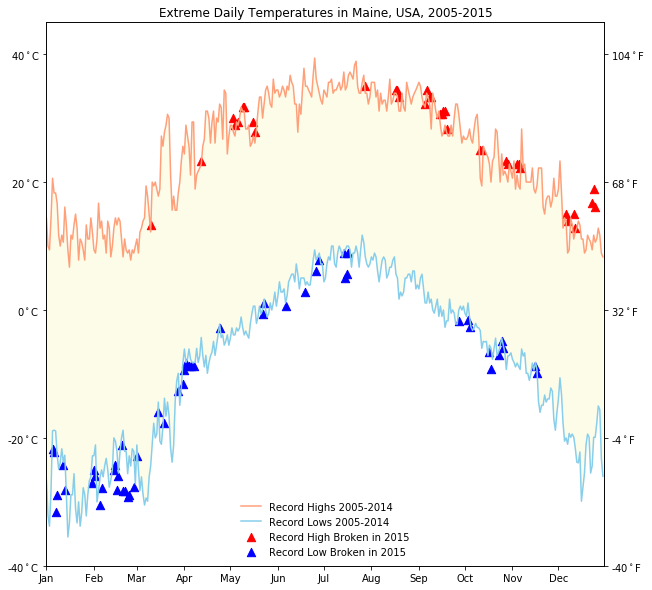

In [16]:
plt.figure()

plt.plot(T_max.values, 'lightsalmon', label = 'Record Highs 2005-2014') 
plt.plot(T_min.values, 'skyblue', label = 'Record Lows 2005-2014') 

plt.gca().fill_between(range(len(T_min)), T_min['Data_Value'], T_max['Data_Value'], 
                       facecolor = 'lightgoldenrodyellow', alpha = 0.5)


plt.scatter(Record_broken_high, T_max_2015.iloc[Record_broken_high], s = 70, c = 'r', marker = '^', 
            label = 'Record High Broken in 2015') 
plt.scatter(Record_broken_low, T_min_2015.iloc[Record_broken_low], s = 70, c = 'b', marker = '^', 
            label = 'Record Low Broken in 2015') 

plt.title('Extreme Daily Temperatures in Maine, USA, 2005-2015') 
plt.legend(loc = 'best', frameon = False)


#find DayofYear for first day of each month to set x-tick labels to months
xticks = (pd.date_range('1/1/2015', '31/12/2015', freq = 'M')-1+pd.Timedelta('1d')).strftime('%-j').astype(int) 
xtick_labels = pd.to_datetime(xticks, format = '%j').strftime('%b') 

plt.gca().set_xlim(1,365)
plt.gca().set_xticks(xticks) 
plt.gca().set_xticklabels(xtick_labels) 

#format y-axis tick lables in deg C
yticks = np.arange(-40,45,20)
ax1 = plt.gca()
ax1.set_ylim(-40,45)
ax1.set_yticks(yticks)
ax1.set_yticklabels(map(lambda x: '{:}$^\circ$C'.format(x), ax1.get_yticks()))

#add second y-axis in deg F
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(ax1.get_yticks())
ax2.set_yticklabels(map(lambda x: '{:}$^\circ$F'.format(x), (1.8*ax1.get_yticks()+32).astype(int)))

plt.show()
               

In [ ]:
file ="data/C2A2_data/BinnedCsvs_d400/fb441......"
import os
!cp "$file" .
# create an archive file with all assignments and
# data files could have zip,tar, .tar.gz, .tgz, extensions
# check http://linuxcommand.org/man_pages/tar1.html for more info
filename = "course2data.zip"
if os.path.exists(filename):
    ! rm "$filename"
filesToCompress = '*.csv *.ipynb'

!tar -czf "$filename" $filesToCompress > /dev/null
from IPython.display import HTML
link = '<a href="{0}" target = _blank>Click here to download {0}</a>'
HTML(link.format(filename))